# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Load Data 

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (1460, 81)
Test shape: (1459, 80)


In [4]:
train.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Missing Values

In [7]:
missing = train.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

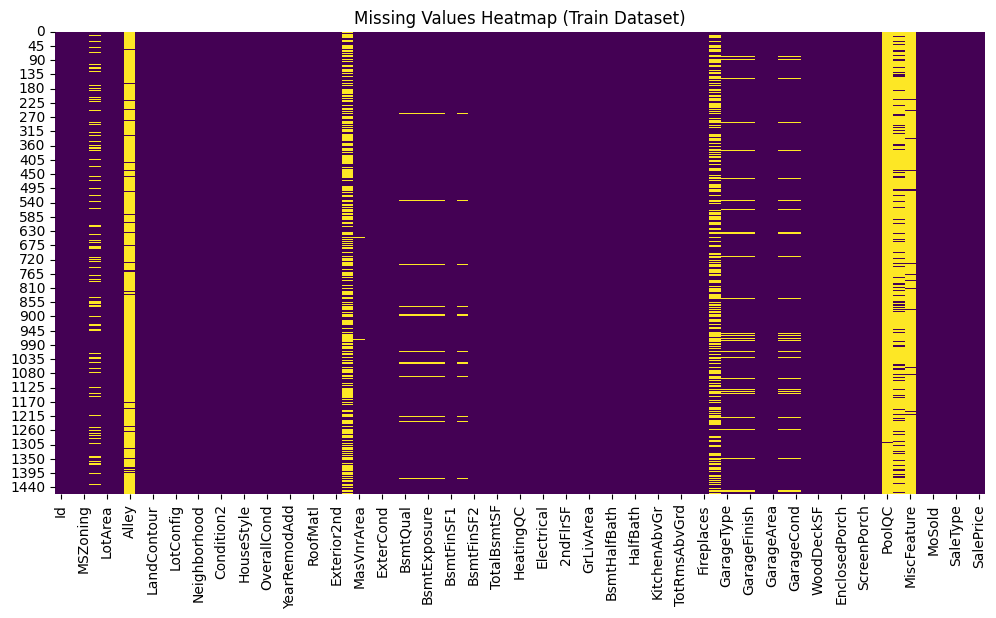

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Train Dataset)")
plt.show()

# Data Cleaning

In [9]:
y = train['SalePrice']
train.drop('SalePrice', axis=1, inplace=True)

In [10]:
data = pd.concat([train, test], sort=False)

In [11]:
for col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'MasVnrType']:
    data[col] = data[col].fillna('None')
    
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars',
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
            'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
            'MasVnrArea']:
    data[col] = data[col].fillna(0)

for col in ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']:
    data[col] = data[col].fillna(data[col].mode()[0])
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

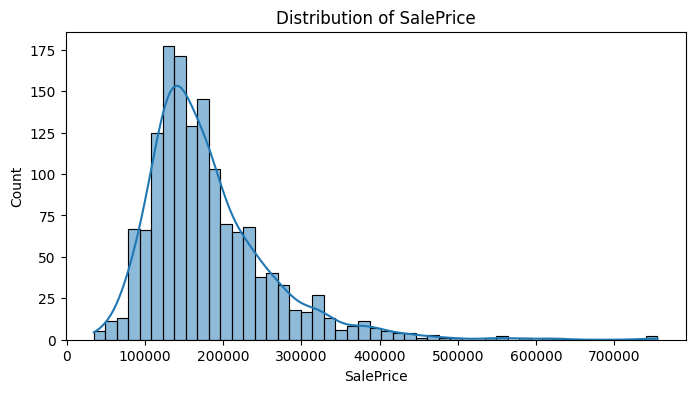

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(y, kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.show()

# Feature Engineering

In [13]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['HouseAge'] = data['YrSold'] - data['YearBuilt']
data['RemodAge'] = data['YrSold'] - data['YearRemodAdd']
data['GarageAge'] = data['YrSold'] - data['GarageYrBlt']
data.drop(['Id', 'Utilities', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)

#  Encoding Categorical Features

In [14]:
label_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
              'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 
              'PoolQC']
for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
data = pd.get_dummies(data)

# Scaling Features

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
X_train = data_scaled[:len(y)]
X_test = data_scaled[len(y):]

#  Train-Test Split

In [16]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y, test_size=0.2, random_state=42)

# Model Training & Evaluation

In [17]:
models = {
    'Ridge': Ridge(alpha=10),
    'Lasso': Lasso(alpha=0.001),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42)
}
for name, model in models.items():
    model.fit(X_train_split, y_train_split)
    preds = model.predict(X_val_split)
    rmse = np.sqrt(mean_squared_error(y_val_split, preds))
    print(f'{name} RMSE: {rmse:.4f}')

Ridge RMSE: 29021.4576
Lasso RMSE: 29212.4195
RandomForest RMSE: 29915.6392


In [18]:
best_model = Lasso(alpha=0.001)
best_model.fit(X_train_split, y_train_split)
val_preds = best_model.predict(X_val_split)

# Predicting on the Test Set 

In [19]:
final_model = Lasso(alpha=0.001)
final_model.fit(X_train, y)
final_preds = final_model.predict(X_test)
print(final_preds[:10])

[115327.34200292 165874.10081487 182276.58366418 184913.05493948
 211683.66083273 167391.8398327  167506.38674793 153068.11839858
 210339.50364686 112972.41705422]


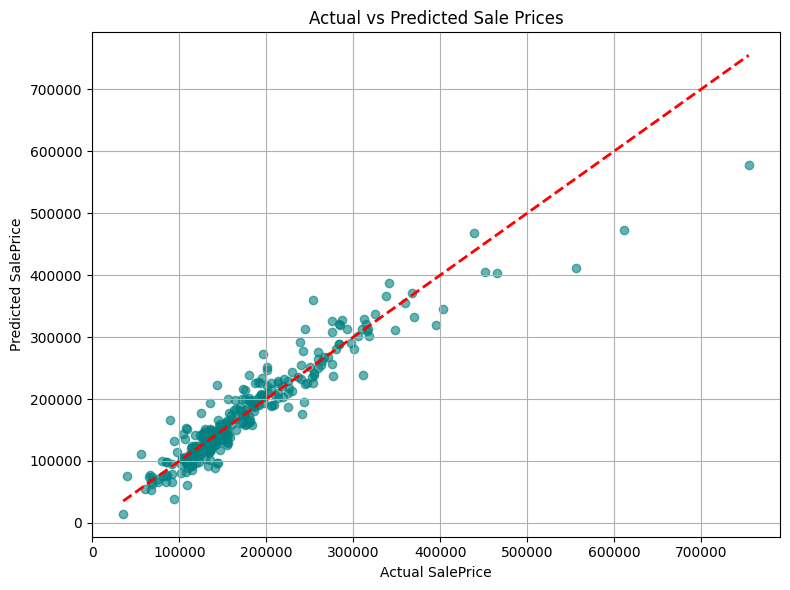

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(y_val_split, val_preds, alpha=0.6, color='teal')
plt.plot([y_val_split.min(), y_val_split.max()], [y_val_split.min(), y_val_split.max()], 'r--', lw=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted Sale Prices')
plt.grid(True)
plt.tight_layout()
plt.show()